In [1]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.graphics.api as smg
import patsy
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats

C:\Users\taeeu\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\taeeu\anaconda3\lib\site-packages\numpy\.libs\libopenblas.el2c6ple4zyw3eceviv3oxxgrn2nrfm2.gfortran-win_amd64.dll
C:\Users\taeeu\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


## 데이터 생성

In [2]:
y=np.array([1,2,3,4,5])
x1=np.array([6,7,8,9,10])
x2=np.array([11,12,13,14,15])

In [3]:
data={"y":y, "x1":x1, "x2":x2}

## 모델 생성

In [4]:
y, X=patsy.dmatrices("y~1+x1+x2+x1:x2", data, return_type="dataframe")
model=sm.OLS(y,X)
result=model.fit()

In [5]:
result.params

Intercept   -5.555556e-01
x1           1.888889e+00
x2          -8.888889e-01
x1:x2       -4.440892e-16
dtype: float64

In [6]:
y,X=patsy.dmatrices("y~x1*x2", data, return_type="dataframe")
model2=sm.OLS(y,X)
result2=model2.fit()
result2.params

Intercept   -5.555556e-01
x1           1.888889e+00
x2          -8.888889e-01
x1:x2       -4.440892e-16
dtype: float64

In [7]:
y,X=patsy.dmatrices("y~x1+x2", data, return_type="dataframe")
model3=sm.OLS(y,X)
result3=model3.fit()
result3.params

Intercept   -0.555556
x1           1.888889
x2          -0.888889
dtype: float64

In [8]:
#로그/삼각 함수를 지정
y,X=patsy.dmatrices("y~np.log(x1)+np.cos(x2)+np.sin(x1+x2)", data, return_type="dataframe")
model4=sm.OLS(y,X)
result4=model4.fit()
result4.params

Intercept         -12.341446
np.log(x1)          7.461383
np.cos(x2)         -0.216429
np.sin(x1 + x2)     0.027374
dtype: float64

## 범주 생성

In [9]:
y,X=patsy.dmatrices("y~-1+C(x1)", data=data, return_type="dataframe")
print(X)

   C(x1)[6]  C(x1)[7]  C(x1)[8]  C(x1)[9]  C(x1)[10]
0       1.0       0.0       0.0       0.0        0.0
1       0.0       1.0       0.0       0.0        0.0
2       0.0       0.0       1.0       0.0        0.0
3       0.0       0.0       0.0       1.0        0.0
4       0.0       0.0       0.0       0.0        1.0


## 1. 선형회귀

In [10]:
# 아이스크림 데이터 : 아이스크림 소비량, 고객의 수입, 아이스크림 가격 및 하루의 온도 

In [11]:
dataset=sm.datasets.get_rdataset("Icecream", "Ecdat")
model=smf.ols("cons~1+income+price+temp", data=dataset.data)
result=model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   cons   R-squared:                       0.719
Model:                            OLS   Adj. R-squared:                  0.687
Method:                 Least Squares   F-statistic:                     22.17
Date:                Fri, 18 Mar 2022   Prob (F-statistic):           2.45e-07
Time:                        17:07:12   Log-Likelihood:                 58.619
No. Observations:                  30   AIC:                            -109.2
Df Residuals:                      26   BIC:                            -103.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1973      0.270      0.730      0.4

In [12]:
#소비량~가격, 온도의 회귀
model=smf.ols("cons~1+price+temp", data=dataset.data)
result=model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   cons   R-squared:                       0.633
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                     23.27
Date:                Fri, 18 Mar 2022   Prob (F-statistic):           1.34e-06
Time:                        17:07:12   Log-Likelihood:                 54.607
No. Observations:                  30   AIC:                            -103.2
Df Residuals:                      27   BIC:                            -99.01
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5966      0.258      2.309      0.0

## 이산회귀분석 : 로지스틱회귀분석

In [13]:
df = sm.datasets.get_rdataset("iris").data 
df_subset=df[df.Species.isin(["versicolor","virginica"])].copy() 
df_subset.Species = df_subset.Species.map({"versicolor":1,"virginica":0}) 
df_subset.rename(columns={"Sepal.Length": "Sepal_Length","Sepal.Width": "Sepal_Width","Petal.Length": "Petal_Length","Petal.Width": "Petal_Width"}, inplace=True)

In [14]:
model = smf.logit("Species ~ Petal_Length + Petal_Width", data=df_subset)
result = model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.102818
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:                Species   No. Observations:                  100
Model:                          Logit   Df Residuals:                       97
Method:                           MLE   Df Model:                            2
Date:                Fri, 18 Mar 2022   Pseudo R-squ.:                  0.8517
Time:                        17:07:14   Log-Likelihood:                -10.282
converged:                       True   LL-Null:                       -69.315
Covariance Type:            nonrobust   LLR p-value:                 2.303e-26
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       45.2723     13.612      3.326      0.001      18.594      71.951
Petal_Length    -5.754

## scatter plot

In [15]:
params=result.params
alpha0 = -params['Intercept']/params['Petal_Width'] 
alpha1 = -params['Petal_Length']/params['Petal_Width']

In [16]:
_x=np.array([3.0, 7.0])

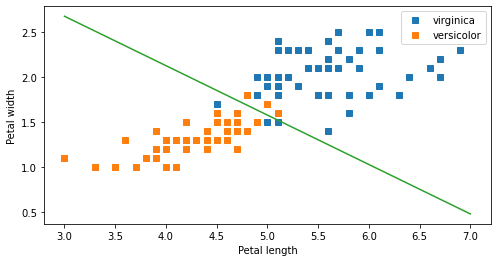

In [17]:
fig, ax = plt.subplots(1,1, figsize=(8,4)) 
ax.plot(df_subset[df_subset.Species==0].Petal_Length.values, df_subset[df_subset.Species==0].Petal_Width.values,'s', label='virginica') 
ax.plot(df_subset[df_subset.Species==1].Petal_Length.values, df_subset[df_subset.Species==1].Petal_Width.values,'s', label='versicolor')
ax.plot(_x,alpha0+alpha1 * _x)
ax.set_xlabel('Petal length')
ax.set_ylabel('Petal width')
ax.legend()